## Parcial 4 (80%).

### Lea las siguientes instrucciones y resuelva el parcial.



*   Lea cada numeral que se encuentra a continuación. Resuelva utilizando este notebook
*   El parcial debe enviarse haciendo uso de git. No se reciben archivos de otra forma. Tenga en cuenta que se debe subir usando git bash y no cargar desde la web, los archivos que se suban desde la web serán descartados.



### Punto 1

Utilice programación orientada a objetos POO para crear un sistema o máquina de la siguiente forma.



*   El sistema tiene 3 luces, una roja para las alarmas, una verde para el funcionamiento y una amarilla para las alertas.
*   El sistema tiene un sensor de presión en bares, un sensor de tensión eléctrica en voltios y un sensor de velocidad en RPMs.
*   El sistema muestra alertas con la luz amarilla si hay algún sensor fuera del rango de operación. Esto es, de 0 a 10 bares, de 120 a 240 voltios y de 8 a 12 RPMs.
*   El sistema muestra alarma si hay 2 sensores o más fuera del rango de operación.
*   Las RPMs vienen de un motor que depende de la corriente para modificar su velocidad, esta corriente a su vez depende del voltaje sabiendo que la potencia es un valor fijo que ud seleccionará. Recuerde que P = V.I.
*   Al incio las variables de operación deben iniciar en un valor dentro del rango, se da un start para inciar el proceso y se debe simular el funcionamiento del sistema con variables aleatorias para los sensores y corriente del motor. Además se debe mostrar los tiempos de alerta, alarma y funcionamiento del motor con un método de mostrar_informacion().
* Utilice al menos 4 métodos.



In [2]:
import random

class sistemasdecontrol:
    
    def __init__(self,potencia):
        self.luz_roja=False
        self.luz_verde=True
        self.luz_amarilla=False
        self.sensor_presion=random.uniform(0,18)
        self.sensor_voltaje=random.uniform(100,250)
        self.sensor_velocidad=random.uniform(0,20)
        self.potencia=potencia
        self.motor_RPM=0

    def calcular_RPM(self):
        corriente=self.potencia/self.sensor_voltaje
        self.motor_RPM=corriente*10

    def Alertas(self):
        Sensor_fuera_rango = 0

        if not (0 <= self.sensor_presion <= 10):
            self.luz_amarilla = True
            Sensor_fuera_rango += 1

        if not (120 <= self.sensor_voltaje <= 240):
            self.luz_amarilla = True
            Sensor_fuera_rango += 1

        if not (8 <= self.sensor_velocidad <= 12):
            self.luz_amarilla = True
            Sensor_fuera_rango += 1

        if Sensor_fuera_rango >= 2:
            self.luz_roja = True
            self.luz_verde = False

    def mostrarlainformacion(self):
         print("Luz roja", "Encendida" if self.luz_roja else "Apagada")
         print("Luz verde", "Encendidad" if self.luz_verde else "Apagada") 
         print("Luz amarilla", "Encendida" if self.luz_amarilla else "Apagada")
         print("Presion", self.sensor_presion, "Bares")
         print("Tension", self.sensor_voltaje, "Voltios")
         print("Velocidad", self.sensor_velocidad, "Velocidad") 
         print("RPM del motor", self.motor_RPM)

sistema=sistemasdecontrol(potencia=1000)
print(f"La presion del sistema es: {sistema.sensor_presion} " )
print(f"La tension del sistema es: {sistema.sensor_voltaje} " )
print(f"La velocuidad del motor es: {sistema.sensor_velocidad} " )
sistema.calcular_RPM()
sistema.Alertas()
sistema.mostrarlainformacion()     

La presion del sistema es: 8.578683995222843 
La tension del sistema es: 174.8488330683603 
La velocuidad del motor es: 1.9458325120046172 
Luz roja Apagada
Luz verde Encendidad
Luz amarilla Encendida
Presion 8.578683995222843 Bares
Tension 174.8488330683603 Voltios
Velocidad 1.9458325120046172 Velocidad
RPM del motor 57.19226044871755


### Punto 2

Utilice la base de datos de NBA para realizar:

* Un filtrado básico de los datos eliminando datos faltantes, datos atípicos, haciendo descripción de estadísticas básicas
* Al menos 5 gráficas diferentes informativas (al menos 3 tipos diferentes de gráficas y puede combinar con las variables a usar). Usted selecciona las variables de interés y lo que desea analizar.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
basesdedatos='/Users/Usuario/Desktop/Cosas de universidad/logica de programacion/Parcial4/Parcial 4/all_seasons.csv'
dataframe=pd.read_csv(basesdedatos,usecols=['team_abbreviation','age','player_weight','college','pts','season'])
df_clean=dataframe.dropna()
print(df_clean)

      team_abbreviation   age  player_weight                college   pts  \
0                   HOU  22.0      94.800728        Louisiana State   3.9   
1                   WAS  28.0      86.182480  Northwestern Oklahoma   3.8   
2                   VAN  26.0     103.418976         North Carolina   8.3   
3                   LAL  30.0     102.058200          Florida State  10.2   
4                   DEN  23.0     119.748288                   UCLA   2.8   
...                 ...   ...            ...                    ...   ...   
12839               PHI  29.0     127.005760                 Kansas  33.1   
12840               POR  20.0      86.182480          Florida State   2.4   
12841               ATL  25.0     102.511792            Wake Forest  13.1   
12842               NYK  24.0     113.398000                  Texas   3.4   
12843               GSW  33.0     102.965384                Alabama   6.4   

        season  
0      1996-97  
1      1996-97  
2      1996-97  
3      

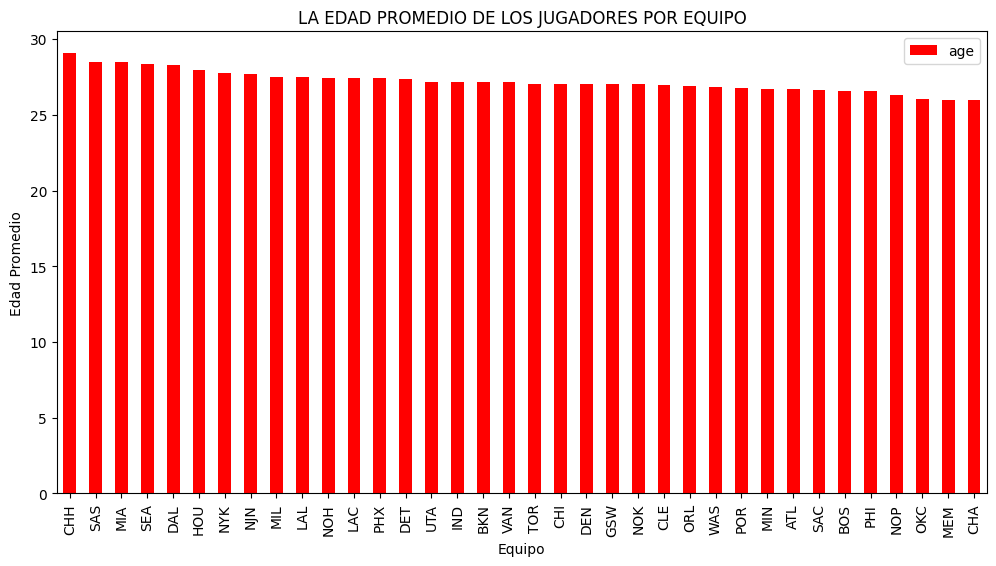

In [3]:
# 1 En esta grafica vamos a observar la edad promedio de los jugadores por equipo(grafico de barras)
team_age = df_clean.groupby('team_abbreviation')['age'].mean().sort_values(ascending=False).reset_index()
team_age.plot(kind='bar',color='red',figsize=(12,6),x='team_abbreviation',y='age')
plt.title('LA EDAD PROMEDIO DE LOS JUGADORES POR EQUIPO')
plt.xlabel('Equipo')
plt.ylabel('Edad Promedio')
plt.show()

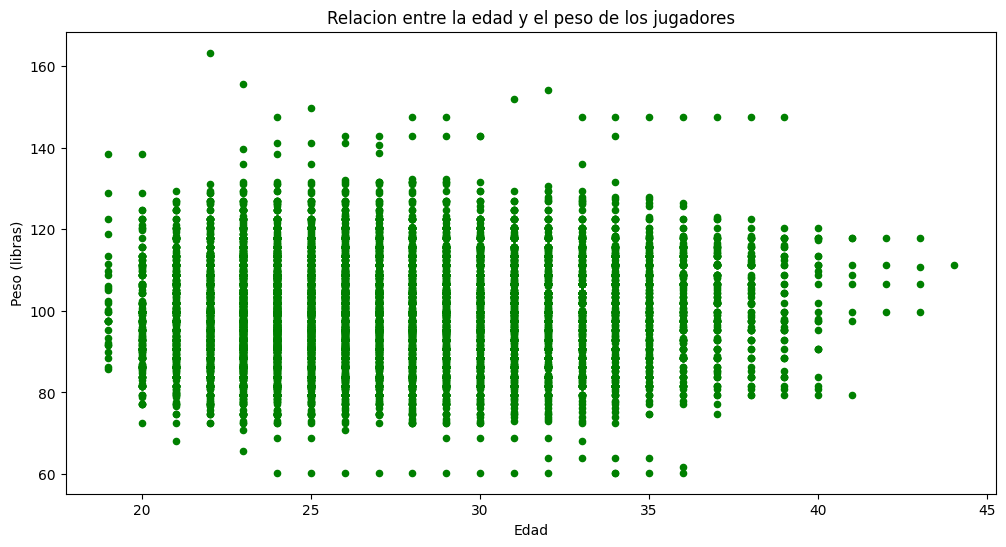

In [4]:
# 2 En esta grafica vamos a ver la relacion entre la edad y el peso de los jugadores (gráfico de dispersión)
df_clean.plot(kind='scatter', x='age', y='player_weight', color='green', figsize=(12, 6))
plt.title('Relacion entre la edad y el peso de los jugadores')
plt.xlabel('Edad')
plt.ylabel('Peso (libras)')
plt.show()

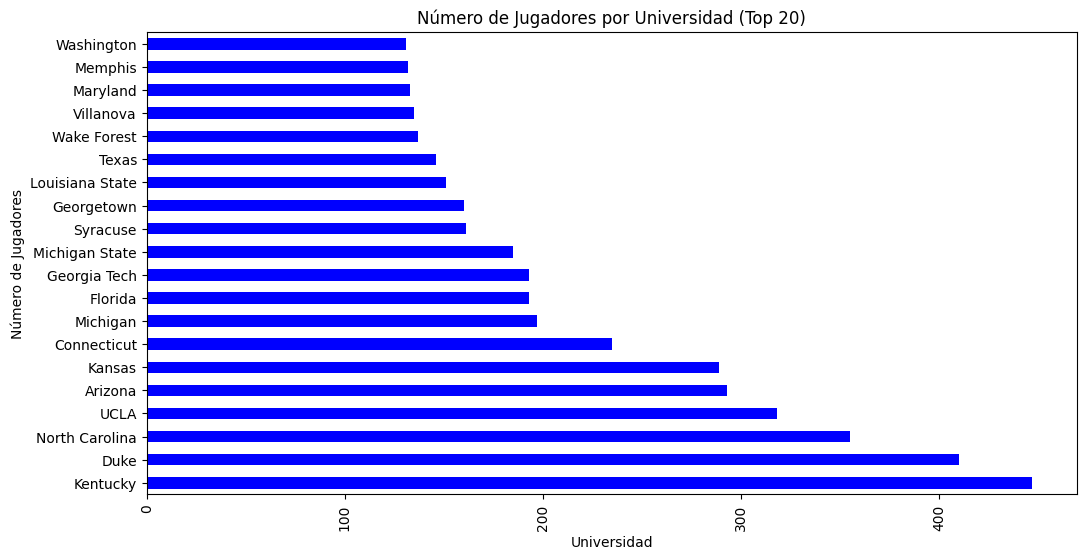

In [5]:
# 3 En esta grafica vamos a ver la relacion de los jugadores que asistieron a diferentes universidaddes por equipo
college_counts = df_clean['college'].value_counts().head(20)
college_counts.plot(kind='barh', color='blue', figsize=(12, 6))
plt.title('Número de Jugadores por Universidad (Top 20)')
plt.xlabel('Universidad')
plt.ylabel('Número de Jugadores')
plt.xticks(rotation=90)
plt.show()

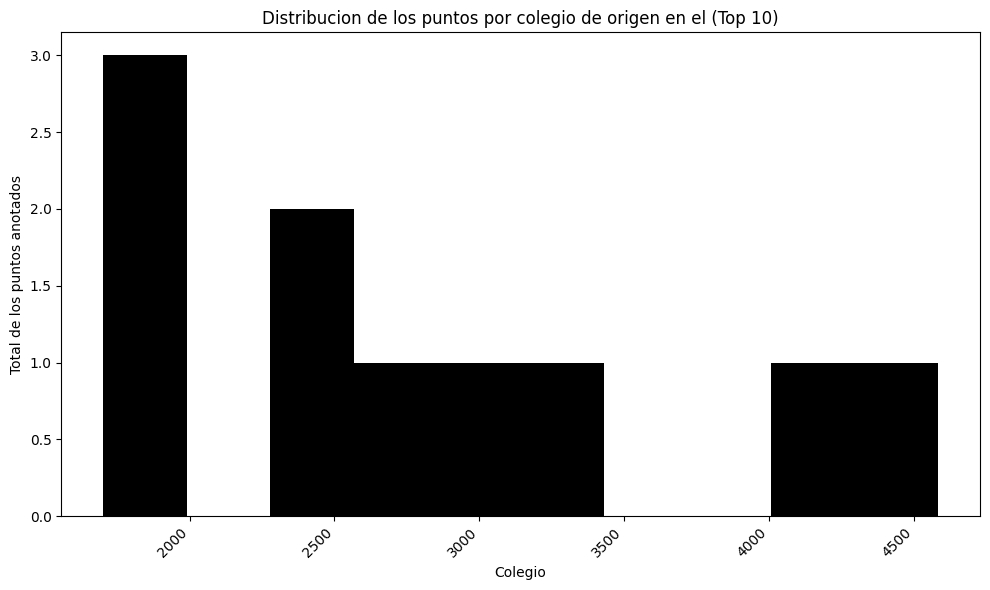

In [6]:
# 4 La distribucion de los puntos por colegio de origen en un histograma
# Agrupar por colegio de origen y sumar los puntos
puntos_por_colegio = dataframe.groupby('college')['pts'].sum().sort_values(ascending=False).head(10)
# Graficar la distribución de puntos por colegio de origen
plt.figure(figsize=(10, 6))
puntos_por_colegio.plot(kind='hist', color='black')
plt.title('Distribucion de los puntos por colegio de origen en el (Top 10)')
plt.xlabel('Colegio')
plt.ylabel('Total de los puntos anotados')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

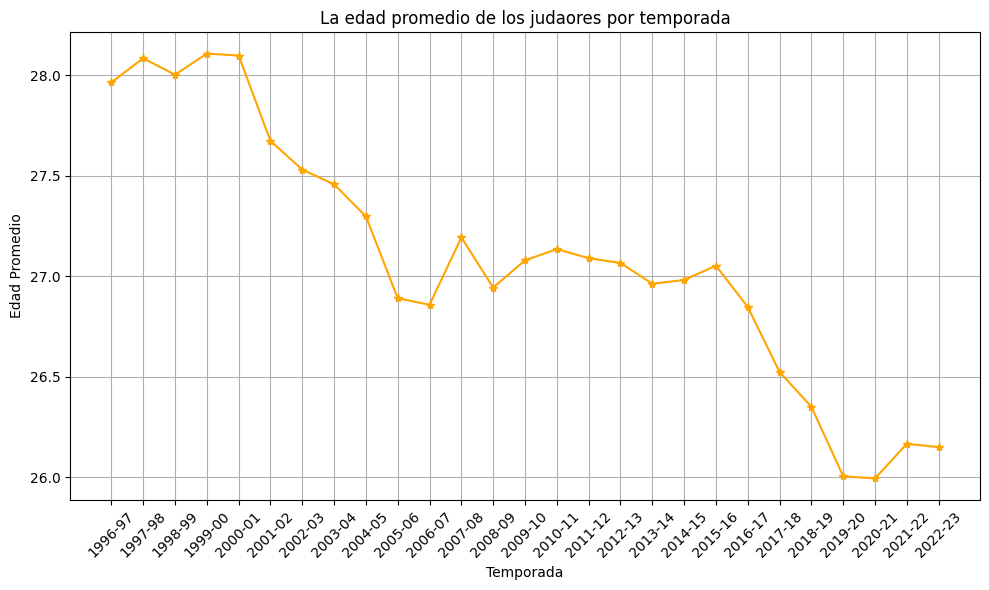

In [7]:
# 5 En esta grafica analizamos la edad promedio de los jugadores por temporda
edadpromedio=dataframe.groupby('season')['age'].mean()
plt.figure(figsize=(10,6))
plt.plot(edadpromedio.index, edadpromedio.values, marker='*', linestyle='-', color='orange')
plt.title('La edad promedio de los judaores por temporada')
plt.xlabel('Temporada')
plt.ylabel('Edad Promedio')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Punto 3

Utilice la carpeta audios para:

* Cargar los audios y graficar las ondas en un gráfica con múltiples plots.
* Mostrar el espectrograma de cada audio usando múltiples plots.
* Tratar de filtrar en el audio más largo que es de una finca de animales algún sonido particular de algún animal.
* 